# Network Parameter Experiment: `network.markPriceUpdateMaximumFrequency`

Experiment varies the network parameter `network.markPriceUpdateMaximumFrequency` to the following two sets of values:

- `2s`
- `10s`
- `30s`
- `60s`

As the various parameter increases, the mark-price should be updated less frequently and produce less events.

Notebook also shows the parameters affect on the size of the data-node postgres database.

## Notebook Setup

In [1]:
import os
from parameter_results.toolkit import SingleParameterExperimentTk

from vega_sim.scenario.common.utils.price_process import Granularity

In [2]:
experiment = SingleParameterExperimentTk(
    path=os.getcwd(),
    dt=1,
    granularity=Granularity.MINUTE,
)

## Market Data

### Market State

As the experiment uses a pre-configured ParameterExperiment scenario, the market should stay mostly in an "Active State".

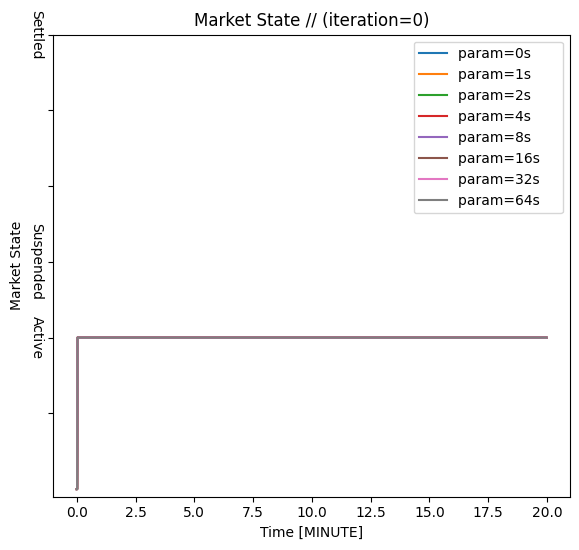

In [3]:
experiment.plot_results(variables=["Market State"])

### Open Interest

The Market Open Interest should be consistent across tested parameter values. Slight variation can be accredited to randomness from use of threads. If results vary dramatically across runs, increase the `environment_step_delay`.

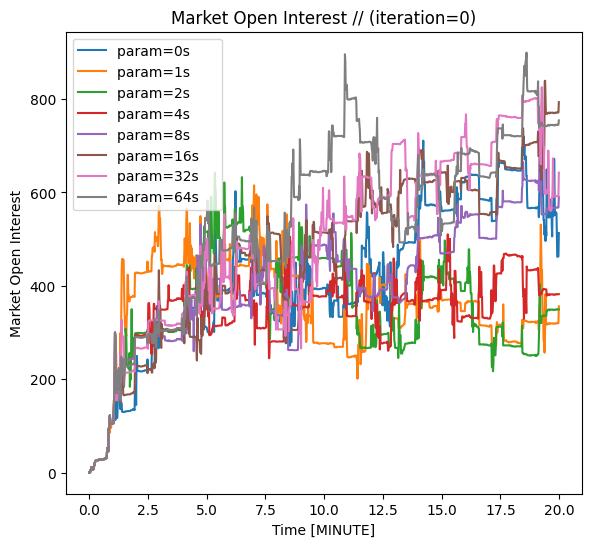

In [4]:
experiment.plot_results(variables=["Market Open Interest"])

### Markprice

As the network parameter `network.markPriceUpdateMaximumFrequency` the mark price should be updated more frequently.

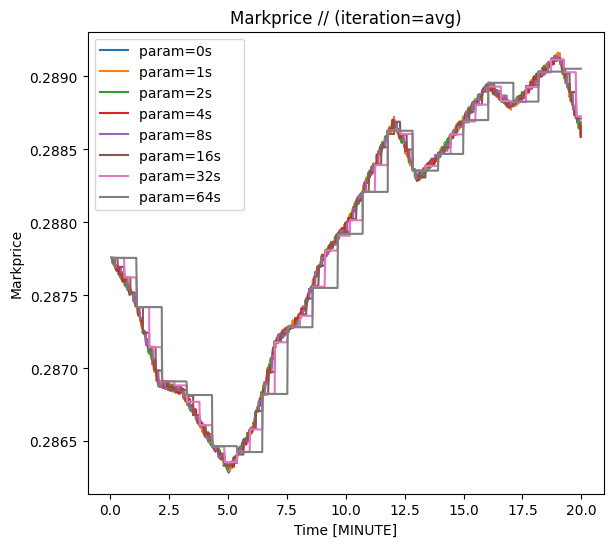

In [5]:
experiment.plot_results(variables=["Markprice"], iterations=["avg"])

## Market-Maker Results

### Position

The market-makers Position should be consistent across tested parameter values. Slight variation can be accredited to randomness from use of threads.  If results vary dramatically across runs, increase the `environment_step_delay`.

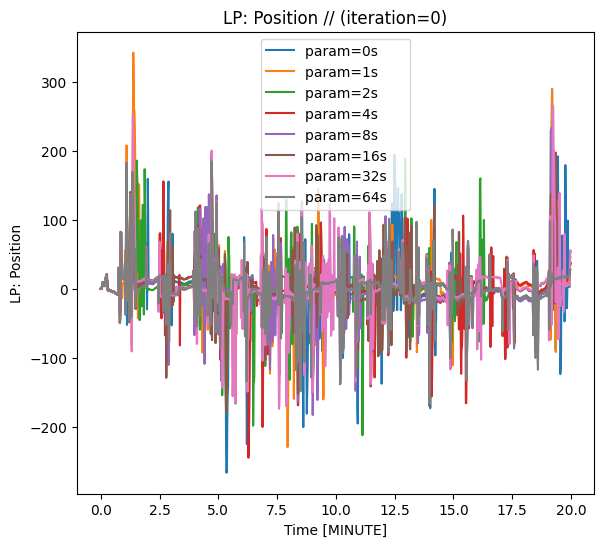

In [6]:
experiment.plot_results(variables=["LP: Position"])

## Datanode Performance

### Postgres Database Size

As the network parameter `network.markPriceUpdateMaximumFrequency` is decrease the size of the postgres database should decrease.

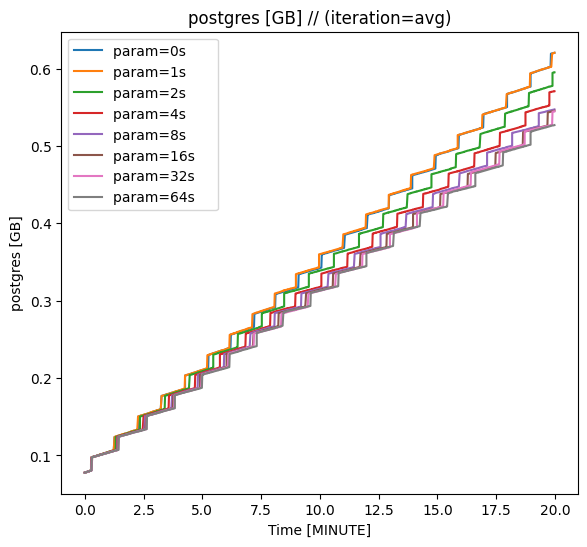

In [7]:
experiment.plot_results(variables=["postgres [GB]"], iterations=["avg"])